In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_3.e-26_max_1.e-22_ng_4',
                          'wgt_1_.7_.6_.5',
                          'tropical')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_3.e-26_max_1.e-22_ng_4',
                               'wgt_1_.7_.6_.5',
                               'tropical')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [15]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [16]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [17]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [18]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [19]:
fig.display_hrefanchor()

In [20]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [21]:
table_dgdgs.display_hrefanchor()

In [22]:
for g in [1, 2, 3, 4]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

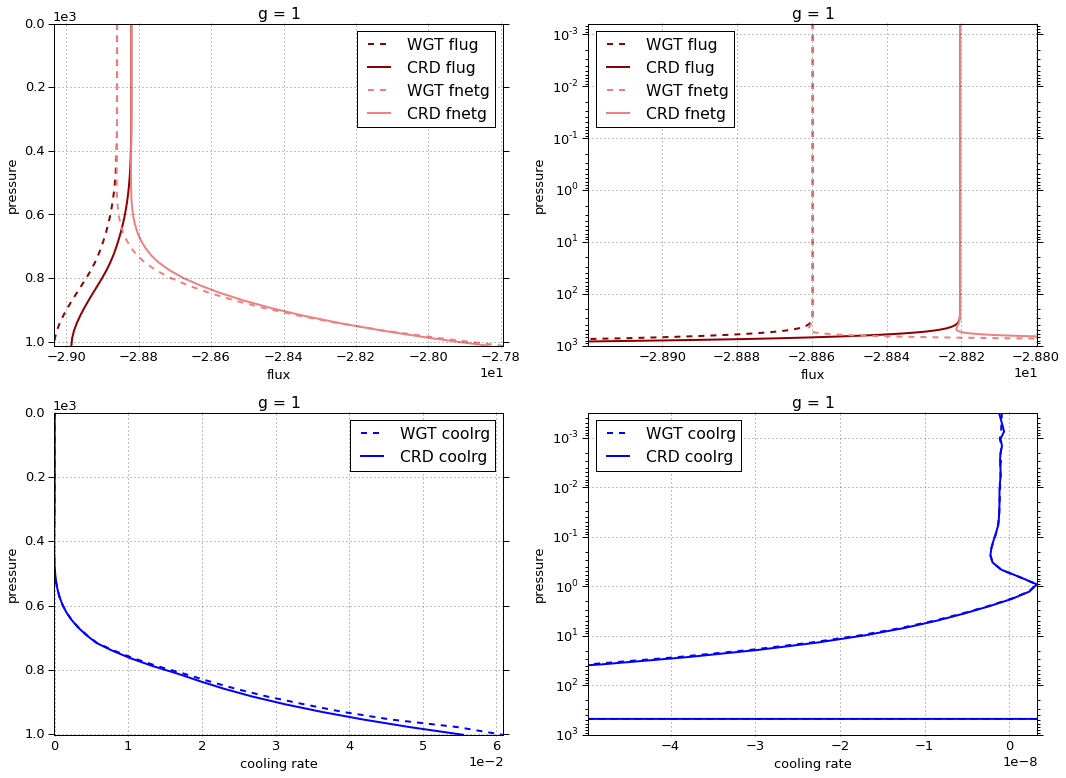

# Figure: flux, cooling rate. g-group 2

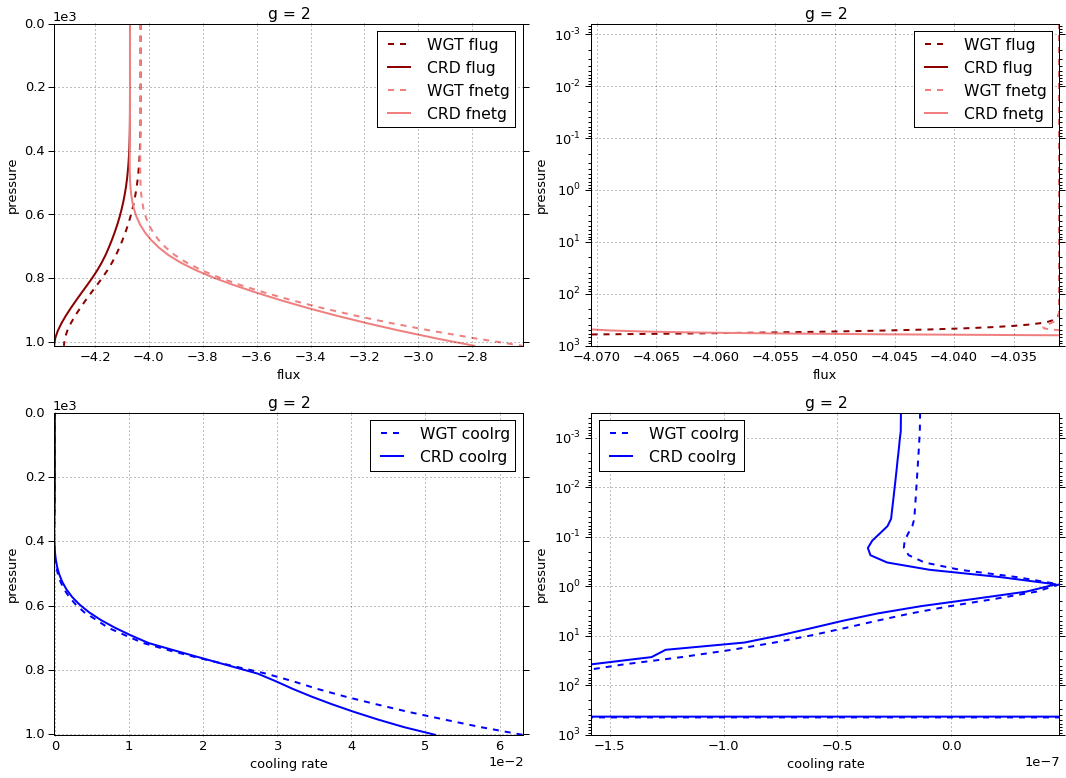

# Figure: flux, cooling rate. g-group 3

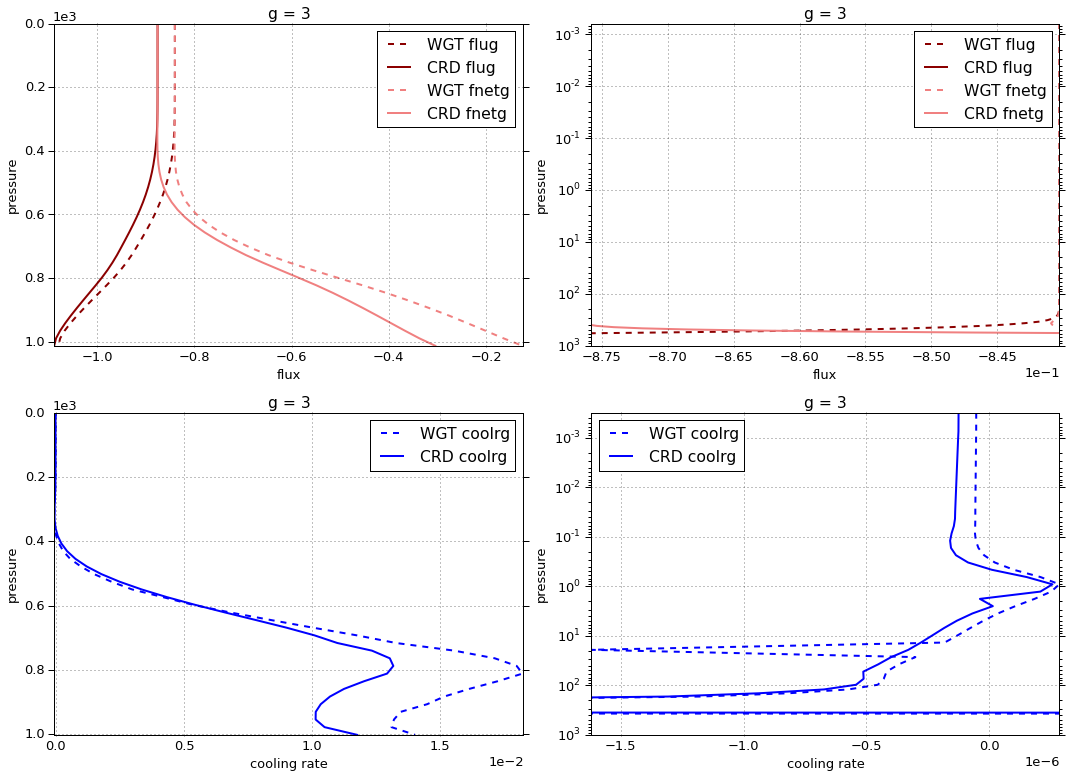

# Figure: flux, cooling rate. g-group 4

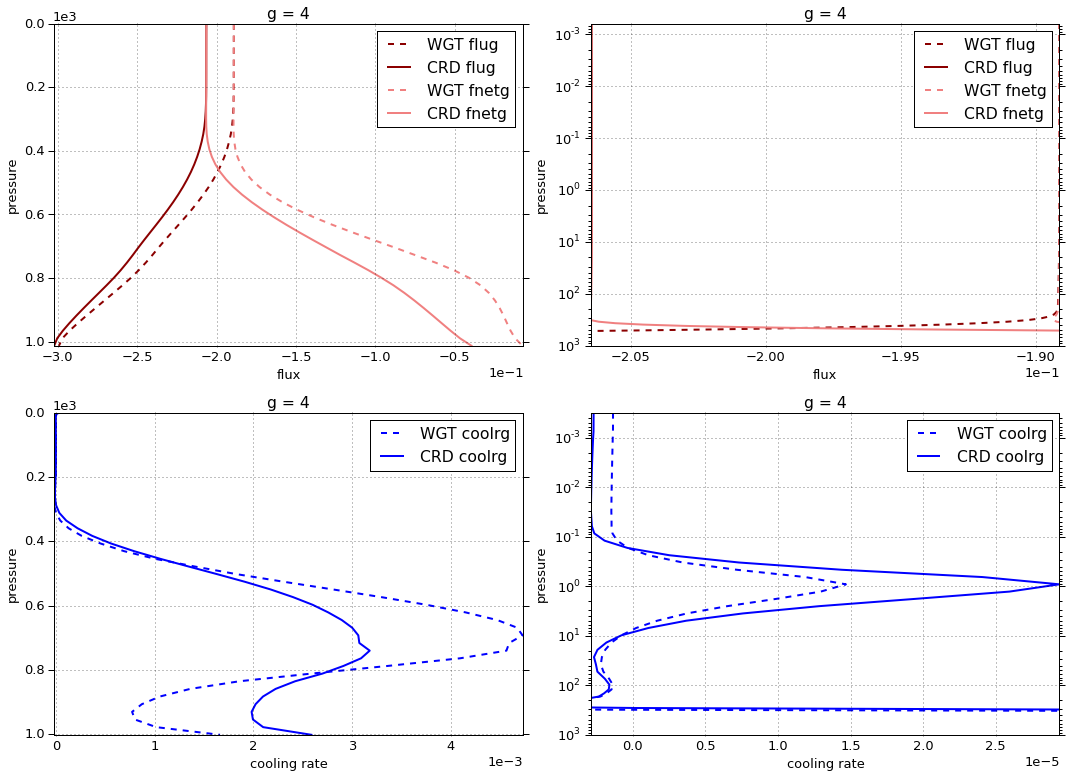

# Figure: flux, cooling rate. g-group total

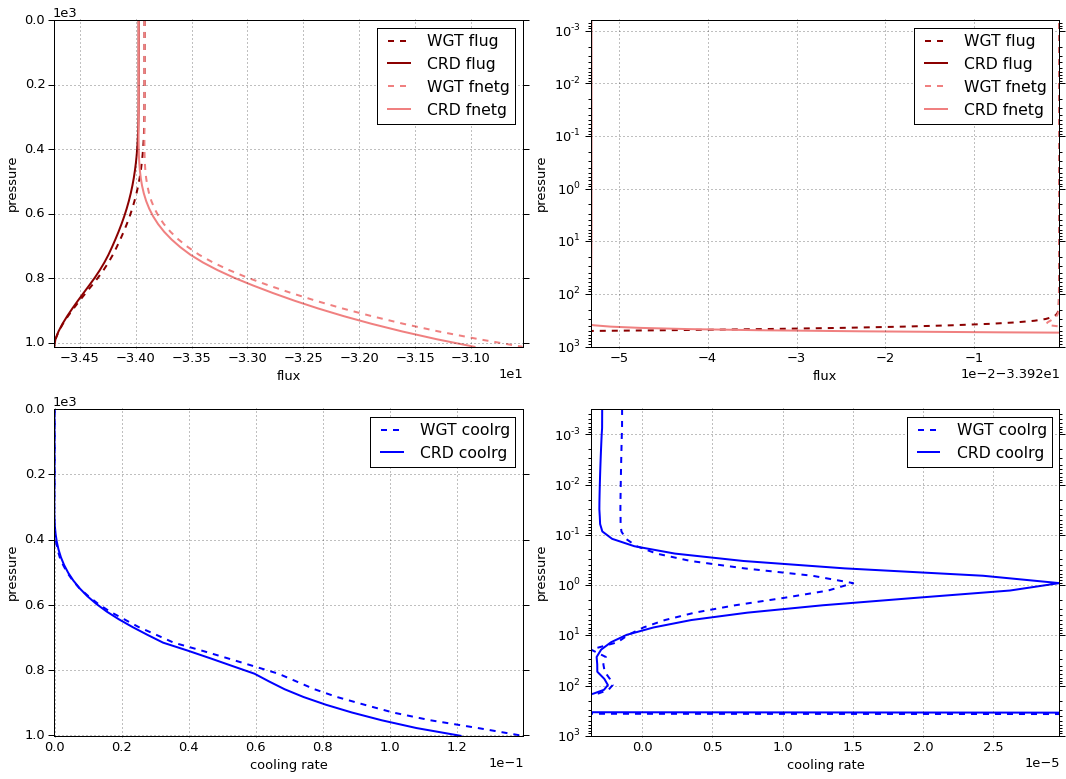

In [23]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [24]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -28.820365  0.000000 -28.820365
  1013     76    -28.985920  1.151562 -27.834358
2 0        1      -4.070491  0.000000  -4.070491
  1013     76     -4.352081  1.560516  -2.791565
3 0        1      -0.875832  0.000000  -0.875832
  1013     76     -1.088407  0.783497  -0.304910
4 0        1      -0.206457  0.000000  -0.206457
  1013     76     -0.302233  0.262675  -0.039557


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -28.859808  0.000000 -28.859808
  1013     76    -29.033530  1.238693 -27.794837
2 0        1      -4.031160  0.000000  -4.031160
  1013     76     -4.315988  1.703122  -2.612866
3 0        1      -0.840283  0.000000  -0.840283
  1013     76     -1.079882  0.954241  -0.125641
4 0        1      -0.189133  0.000000  -0.189133
  1013     76     -0.299241  0.291796  -0.007444


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.039443  0.000000 -0.039443
  1013     76    -0.047610  0.087131  0.039521
2 0        1      0.039331  0.000000  0.039331
  1013     76     0.036093  0.142606  0.178699
3 0        1      0.035549  0.000000  0.035549
  1013     76     0.008525  0.170744  0.179269
4 0        1      0.017324  0.000000  0.017324
  1013     76     0.002992  0.029121  0.032113

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.200815e-09
  1001.112500 75     5.548396e-02
2 0.000312    1     -2.213102e-08
  1001.112500 75     5.131129e-02
3 0.000312    1     -1.244840e-07
  1001.112500 75     1.174439e-02
4 0.000312    1     -2.703084e-06
  1001.112500 75     2.588600e-03


WGT


coolrg
g pressure    layer              
1 0.000312    1     -8.645869e-10
  1001.112500 75     6.084583e-02
2 0.000312    1     -1.371331e-08
  1001.112500 75     6.310300e-02
3 0.000312    1     -5.256568e-08
  1001.112500 75     1.400528e-02
4 0.000312    1     -1.365668e-06
  1001.112500 75     1.662017e-03


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      3.362283e-10
  1001.112500 75     5.361869e-03
2 0.000312    1      8.417715e-09
  1001.112500 75     1.179171e-02
3 0.000312    1      7.191833e-08
  1001.112500 75     2.260885e-03
4 0.000312    1      1.337417e-06
  1001.112500 75    -9.265833e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.973145,0.00000,-33.973145
1013,76,-34.728640,3.75825,-30.970390



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.920385,0.000000,-33.920385
1013,76,-34.728641,4.187853,-30.540788



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,5.276029e-02,0.000000,0.052760
1013,76,-6.000000e-07,0.429603,0.429602


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000003
1001.112500,75,0.121128



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000001
1001.112500,75,0.139616



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000001
1001.112500,75,0.018488


In [25]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.831875,0.836011
2,0.127417,0.124277
3,0.031833,0.031095
4,0.008875,0.008617


In [26]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -28.859808  0.000000e+00 -28.859808   1     1   
0.000624      1     2 -28.859808  1.039538e-14 -28.859808   1     2   
0.000876      1     3 -28.859808  1.565108e-14 -28.859808   1     3   
0.001229      1     4 -28.859808  2.163770e-14 -28.859808   1     4   
0.001723      1     5 -28.859808  3.062924e-14 -28.859808   1     5   
0.002417      1     6 -28.859808  4.630352e-14 -28.859808   1     6   
0.003391      1     7 -28.859808  6.647937e-14 -28.859808   1     7   
0.004757      1     8 -28.859808  9.636609e-14 -28.859808   1     8   
0.006672      1     9 -28.859808  1.404420e-13 -28.859808   1     9   
0.009359      1    10 -28.859808  2.069098e-13 -28.859808   1    10   
0.013128      1    11 -28.859808  3.018024e-13 -28.859808   1    11   
0.018415      1    12 -28.859808  4.444721e-13 -28.859808   1    12   
0.025830      1    13 -28.859808  6.536442e-13 -28.859808   1    13   
0.036232      1    14 -28.859808  9.617813e-13 -28.859808   1    14   
0.050823      1    15 -28.859808  1.434005e-12 -28.859808   1    15   
0.071291      1    16 -28.859808  2.256401e-12 -28.859808   1    16   
0.100000      1    17 -28.859808  3.974747e-12 -28.859808   1    17   
0.140271      1    18 -28.859808  7.870230e-12 -28.859808   1    18   
0.196760      1    19 -28.859808  1.688822e-11 -28.859808   1    19   
0.275997      1    20 -28.859808  3.802444e-11 -28.859808   1    20   
0.387100      1    21 -28.859808  8.822706e-11 -28.859808   1    21   
0.543100      1    22 -28.859808  2.088157e-10 -28.859808   1    22   
0.761700      1    23 -28.859808  4.848353e-10 -28.859808   1    23   
1.068500      1    24 -28.859808  9.869083e-10 -28.859808   1    24   
1.498800      1    25 -28.859808  1.693050e-09 -28.859808   1    25   
2.102400      1    26 -28.859808  2.620297e-09 -28.859808   1    26   
2.949000      1    27 -28.859808  3.794004e-09 -28.859808   1    27   
4.136600      1    28 -28.859808  5.306384e-09 -28.859808   1    28   
5.802500      1    29 -28.859808  7.323109e-09 -28.859808   1    29   
8.139200      1    30 -28.859808  1.008721e-08 -28.859808   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -28.860026  8.340069e-05 -28.859943   1    47   
347.300000    1    48 -28.860216  1.764016e-04 -28.860040   1    48   
371.075000    1    49 -28.860524  3.468910e-04 -28.860177   1    49   
394.850000    1    50 -28.860969  6.253779e-04 -28.860344   1    50   
418.625000    1    51 -28.861595  1.064767e-03 -28.860530   1    51   
442.400000    1    52 -28.862449  1.737192e-03 -28.860712   1    52   
466.175000    1    53 -28.863587  2.738976e-03 -28.860848   1    53   
489.950000    1    54 -28.865069  4.196690e-03 -28.860872   1    54   
513.725000    1    55 -28.866956  6.270395e-03 -28.860686   1    55   
537.500000    1    56 -28.869317  9.166734e-03 -28.860150   1    56   
561.275000    1    57 -28.872216  1.314017e-02 -28.859075   1    57   
585.050000    1    58 -28.875714  1.850435e-02 -28.857210   1    58   
608.825000    1    59 -28.879869  2.564408e-02 -28.854225   1    59   
632.600000    1    60 -28.884722  3.501285e-02 -28.849709   1    60   
656.375000    1    61 -28.890307  4.715194e-02 -28.843155   1    61   
680.150000    1    62 -28.896634  6.267176e-02 -28.833962   1    62   
703.925000    1    63 -28.903726  8.222034e-02 -28.821506   1    63   
727.700000    1    64 -28.911813  1.065485e-01 -28.805264   1    64   
751.475000    1    65 -28.921187  1.386219e-01 -28.782565   1    65   
775.250000    1    66 -28.932012  1.796472e-01 -28.752364   1    66   
799.025000    1    67 -28.944207  2.308824e-01 -28.713324   1    67   
822.800000    1    68 -28.957620  2.936540e-01 -28.663966   1    68   
846.575000    1    69 -28.971093  3.

In [27]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -4.031160  0.000000e+00 -4.031160   2     1 -4.070491   
0.000624      2     2 -4.031160  1.843356e-13 -4.031160   2     2 -4.070491   
0.000876      2     3 -4.031160  2.602058e-13 -4.031160   2     3 -4.070491   
0.001229      2     4 -4.031160  3.705459e-13 -4.031160   2     4 -4.070491   
0.001723      2     5 -4.031160  5.317101e-13 -4.031160   2     5 -4.070491   
0.002417      2     6 -4.031160  7.671467e-13 -4.031160   2     6 -4.070491   
0.003391      2     7 -4.031160  1.111172e-12 -4.031160   2     7 -4.070491   
0.004757      2     8 -4.031160  1.613538e-12 -4.031160   2     8 -4.070491   
0.006672      2     9 -4.031160  2.347866e-12 -4.031160   2     9 -4.070491   
0.009359      2    10 -4.031160  3.420410e-12 -4.031160   2    10 -4.070491   
0.013128      2    11 -4.031160  4.988276e-12 -4.031160   2    11 -4.070491   
0.018415      2    12 -4.031160  7.280527e-12 -4.031160   2    12 -4.070491   
0.025830      2    13 -4.031160  1.063352e-11 -4.031160   2    13 -4.070491   
0.036232      2    14 -4.031160  1.554730e-11 -4.031160   2    14 -4.070491   
0.050823      2    15 -4.031160  2.291158e-11 -4.031160   2    15 -4.070491   
0.071291      2    16 -4.031160  3.535619e-11 -4.031160   2    16 -4.070491   
0.100000      2    17 -4.031160  6.006198e-11 -4.031160   2    17 -4.070491   
0.140271      2    18 -4.031160  1.127783e-10 -4.031160   2    18 -4.070491   
0.196760      2    19 -4.031160  2.268842e-10 -4.031160   2    19 -4.070491   
0.275997      2    20 -4.031160  4.758498e-10 -4.031160   2    20 -4.070491   
0.387100      2    21 -4.031160  1.023673e-09 -4.031160   2    21 -4.070491   
0.543100      2    22 -4.031160  2.237429e-09 -4.031160   2    22 -4.070491   
0.761700      2    23 -4.031160  4.797012e-09 -4.031160   2    23 -4.070491   
1.068500      2    24 -4.031160  9.133243e-09 -4.031160   2    24 -4.070491   
1.498800      2    25 -4.031160  1.481461e-08 -4.031160   2    25 -4.070491   
2.102400      2    26 -4.031160  2.165854e-08 -4.031160   2    26 -4.070491   
2.949000      2    27 -4.031160  2.947650e-08 -4.031160   2    27 -4.070491   
4.136600      2    28 -4.031160  3.847442e-08 -4.031160   2    28 -4.070491   
5.802500      2    29 -4.031160  4.918797e-08 -4.031160   2    29 -4.070491   
8.139200      2    30 -4.031160  6.239859e-08 -4.031160   2    30 -4.070491   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.031675  2.174591e-04 -4.031458   2    47 -4.071022   
347.300000    2    48 -4.032095  4.551997e-04 -4.031639   2    48 -4.071467   
371.075000    2    49 -4.032761  8.859175e-04 -4.031875   2    49 -4.072172   
394.850000    2    50 -4.033725  1.580998e-03 -4.032144   2    50 -4.073172   
418.625000    2    51 -4.035031  2.664061e-03 -4.032366   2    51 -4.074544   
442.400000    2    52 -4.036814  4.300227e-03 -4.032514   2    52 -4.076374   
466.175000    2    53 -4.039141  6.705112e-03 -4.032436   2    53 -4.078755   
489.950000    2    54 -4.042070  1.015515e-02 -4.031915   2    54 -4.081779   
513.725000    2    55 -4.045750  1.498961e-02 -4.030760   2    55 -4.085536   
537.500000    2    56 -4.050243  2.163346e-02 -4.028610   2    56 -4.090117   
561.275000    2    57 -4.055641  3.058929e-02 -4.025052   2    57 -4.095597   
585.050000    2    58 -4.062025  4.244879e-02 -4.019576   2    58 -4.102033   
608.825000    2    59 -4.069456  5.789954e-02 -4.011557   2    59 -4.109470   
632.600000    2    60 -4.077952  7.761509e-02 -4.000336   2    60 -4.117918   
656.375000    2    61 -4.087485  1.030182e-01 -3.984467   2    61 -4.127360   
680.150000    2    62 -4.098115  1.338528e-01 -3.964262   2    62 -4.137757   
703.925000    2    63 -4.109745  1.722620e-01 -3.937483   2   

In [28]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.840283  0.000000e+00 -0.840283   3     1 -0.875832   
0.000624      3     2 -0.840283  9.489466e-13 -0.840283   3     2 -0.875832   
0.000876      3     3 -0.840283  1.338977e-12 -0.840283   3     3 -0.875832   
0.001229      3     4 -0.840283  1.903233e-12 -0.840283   3     4 -0.875832   
0.001723      3     5 -0.840283  2.723747e-12 -0.840283   3     5 -0.875832   
0.002417      3     6 -0.840283  3.916691e-12 -0.840283   3     6 -0.875832   
0.003391      3     7 -0.840283  5.651312e-12 -0.840283   3     7 -0.875832   
0.004757      3     8 -0.840283  8.173667e-12 -0.840283   3     8 -0.875832   
0.006672      3     9 -0.840283  1.184158e-11 -0.840283   3     9 -0.875832   
0.009359      3    10 -0.840283  1.717622e-11 -0.840283   3    10 -0.875832   
0.013128      3    11 -0.840283  2.493596e-11 -0.840283   3    11 -0.875832   
0.018415      3    12 -0.840283  3.622645e-11 -0.840283   3    12 -0.875832   
0.025830      3    13 -0.840283  5.266009e-11 -0.840283   3    13 -0.875832   
0.036232      3    14 -0.840283  7.662068e-11 -0.840283   3    14 -0.875832   
0.050823      3    15 -0.840283  1.122960e-10 -0.840283   3    15 -0.875832   
0.071291      3    16 -0.840283  1.713247e-10 -0.840283   3    16 -0.875832   
0.100000      3    17 -0.840283  2.838613e-10 -0.840283   3    17 -0.875832   
0.140271      3    18 -0.840283  5.130274e-10 -0.840283   3    18 -0.875832   
0.196760      3    19 -0.840283  9.865068e-10 -0.840283   3    19 -0.875832   
0.275997      3    20 -0.840283  1.972830e-09 -0.840283   3    20 -0.875832   
0.387100      3    21 -0.840283  4.045108e-09 -0.840283   3    21 -0.875832   
0.543100      3    22 -0.840283  8.429249e-09 -0.840283   3    22 -0.875832   
0.761700      3    23 -0.840283  1.730013e-08 -0.840283   3    23 -0.875832   
1.068500      3    24 -0.840283  3.216621e-08 -0.840283   3    24 -0.875832   
1.498800      3    25 -0.840283  5.200128e-08 -0.840283   3    25 -0.875832   
2.102400      3    26 -0.840283  7.653980e-08 -0.840283   3    26 -0.875832   
2.949000      3    27 -0.840283  1.054007e-07 -0.840283   3    27 -0.875832   
4.136600      3    28 -0.840283  1.393740e-07 -0.840283   3    28 -0.875832   
5.802500      3    29 -0.840283  1.803522e-07 -0.840283   3    29 -0.875832   
8.139200      3    30 -0.840284  2.310668e-07 -0.840283   3    30 -0.875832   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.841169  5.214391e-04 -0.840647   3    47 -0.876772   
347.300000    3    48 -0.841862  1.062877e-03 -0.840800   3    48 -0.877489   
371.075000    3    49 -0.842925  2.014648e-03 -0.840910   3    49 -0.878569   
394.850000    3    50 -0.844345  3.503230e-03 -0.840842   3    50 -0.880027   
418.625000    3    51 -0.846213  5.747499e-03 -0.840465   3    51 -0.881929   
442.400000    3    52 -0.848638  9.019943e-03 -0.839618   3    52 -0.884345   
466.175000    3    53 -0.851648  1.363479e-02 -0.838013   3    53 -0.887331   
489.950000    3    54 -0.855289  2.005717e-02 -0.835231   3    54 -0.890936   
513.725000    3    55 -0.859636  2.864390e-02 -0.830992   3    55 -0.895201   
537.500000    3    56 -0.864727  3.989401e-02 -0.824833   3    56 -0.900143   
561.275000    3    57 -0.870741  5.431837e-02 -0.816422   3    57 -0.905770   
585.050000    3    58 -0.877199  7.254148e-02 -0.804657   3    58 -0.912056   
608.825000    3    59 -0.884579  9.496728e-02 -0.789612   3    59 -0.918959   
632.600000    3    60 -0.892585  1.221094e-01 -0.770476   3    60 -0.926401   
656.375000    3    61 -0.901096  1.542683e-01 -0.746827   3    61 -0.934274   
680.150000    3    62 -0.910102  1.915283e-01 -0.718573   3    62 -0.942442   
703.925000    3    63 -0.919433  2.339266e-01 -0.685506   3   

In [30]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.189133  0.000000e+00 -0.189133   4     1 -0.206457   
0.000624      4     2 -0.189133  3.470342e-11 -0.189133   4     2 -0.206457   
0.000876      4     3 -0.189133  4.901458e-11 -0.189133   4     3 -0.206457   
0.001229      4     4 -0.189133  6.986357e-11 -0.189133   4     4 -0.206457   
0.001723      4     5 -0.189133  1.003950e-10 -0.189133   4     5 -0.206457   
0.002417      4     6 -0.189133  1.450842e-10 -0.189133   4     6 -0.206457   
0.003391      4     7 -0.189133  2.104966e-10 -0.189133   4     7 -0.206457   
0.004757      4     8 -0.189133  3.062352e-10 -0.189133   4     8 -0.206457   
0.006672      4     9 -0.189133  4.463400e-10 -0.189133   4     9 -0.206457   
0.009359      4    10 -0.189133  6.513606e-10 -0.189133   4    10 -0.206457   
0.013128      4    11 -0.189133  9.513544e-10 -0.189133   4    11 -0.206457   
0.018415      4    12 -0.189133  1.390310e-09 -0.189133   4    12 -0.206457   
0.025830      4    13 -0.189133  2.032604e-09 -0.189133   4    13 -0.206457   
0.036232      4    14 -0.189133  2.973614e-09 -0.189133   4    14 -0.206457   
0.050823      4    15 -0.189133  4.382852e-09 -0.189133   4    15 -0.206457   
0.071291      4    16 -0.189133  6.766779e-09 -0.189133   4    16 -0.206457   
0.100000      4    17 -0.189133  1.148809e-08 -0.189133   4    17 -0.206457   
0.140271      4    18 -0.189133  2.140773e-08 -0.189133   4    18 -0.206457   
0.196760      4    19 -0.189133  4.221800e-08 -0.189133   4    19 -0.206457   
0.275997      4    20 -0.189133  8.548505e-08 -0.189133   4    20 -0.206458   
0.387100      4    21 -0.189134  1.746142e-07 -0.189133   4    21 -0.206458   
0.543100      4    22 -0.189134  3.562208e-07 -0.189133   4    22 -0.206458   
0.761700      4    23 -0.189134  7.051984e-07 -0.189133   4    23 -0.206458   
1.068500      4    24 -0.189134  1.265473e-06 -0.189132   4    24 -0.206458   
1.498800      4    25 -0.189134  1.988796e-06 -0.189132   4    25 -0.206458   
2.102400      4    26 -0.189134  2.846594e-06 -0.189131   4    26 -0.206458   
2.949000      4    27 -0.189134  3.796736e-06 -0.189130   4    27 -0.206458   
4.136600      4    28 -0.189135  4.823838e-06 -0.189130   4    28 -0.206459   
5.802500      4    29 -0.189135  5.932234e-06 -0.189130   4    29 -0.206460   
8.139200      4    30 -0.189137  7.129943e-06 -0.189129   4    30 -0.206462   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.190308  9.595279e-04 -0.189349   4    47 -0.207657   
347.300000    4    48 -0.191055  1.826169e-03 -0.189229   4    48 -0.208389   
371.075000    4    49 -0.192112  3.238531e-03 -0.188873   4    49 -0.209407   
394.850000    4    50 -0.193448  5.305589e-03 -0.188142   4    50 -0.210677   
418.625000    4    51 -0.195088  8.219209e-03 -0.186869   4    51 -0.212219   
442.400000    4    52 -0.197061  1.213625e-02 -0.184924   4    52 -0.214042   
466.175000    4    53 -0.199403  1.730745e-02 -0.182095   4    53 -0.216152   
489.950000    4    54 -0.202022  2.388286e-02 -0.178139   4    54 -0.218552   
513.725000    4    55 -0.204997  3.200996e-02 -0.172987   4    55 -0.221226   
537.500000    4    56 -0.208297  4.181477e-02 -0.166482   4    56 -0.224166   
561.275000    4    57 -0.211879  5.330243e-02 -0.158577   4    57 -0.227350   
585.050000    4    58 -0.215717  6.642240e-02 -0.149295   4    58 -0.230751   
608.825000    4    59 -0.219772  8.104388e-02 -0.138729   4    59 -0.234332   
632.600000    4    60 -0.223962  9.692576e-02 -0.127036   4    60 -0.238045   
656.375000    4    61 -0.228205  1.137645e-01 -0.114440   4    61 -0.241819   
680.150000    4    62 -0.232410  1.311336e-01 -0.101277   4    62 -0.245573   
703.925000    4    63 -0.236497  1.485377e-01 -0.087959   4   

In [31]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')